In [ ]:
import pandas as pd
import numpy as np
import random
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.transforms as tr
import scipy.misc
from scipy import ndimage
import os
import time

In [ ]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
input_images='/content/drive/My Drive/input_images'

In [ ]:
images=load_images(input_images)

In [ ]:
print("Number of Images :",len(images))

Number of Images : 11


Showing 2 different images :


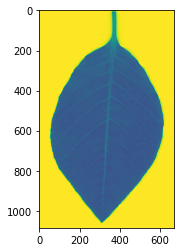

In [ ]:
print("Showing 2 different images :")
plt.imshow(images[1])
plt.show()


imgs=[]

Showing 2 different images :


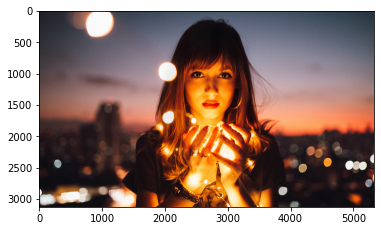

In [ ]:
print("Showing 2 different images :")
plt.imshow(images[7])
plt.show()


imgs=[]

In [ ]:
stores=[]
for i in range(len(images)):
    stores.append(np.zeros((images[i].shape[0]-2,images[i].shape[1]-2)))
print(len(stores))

11


In [ ]:
st=time.time()
global stores
print(len(images))
for k in range(len(images)):
    print("Creating Shingle for Image :",k+1)
    for i in range(images[k].shape[0]-2):
        for j in range(images[k].shape[1]-2):
            sl=images[k][i:i+3,j:j+3]
            # print(sl)
            stores[k][i][j]=np.sum(sl)
en=time.time()
print("Time taken =" ,(en-st),"s")

11
Creating Shingle for Image : 1
Creating Shingle for Image : 2
Creating Shingle for Image : 3
Creating Shingle for Image : 4
Creating Shingle for Image : 5
Creating Shingle for Image : 6
Creating Shingle for Image : 7
Creating Shingle for Image : 8
Creating Shingle for Image : 9
Creating Shingle for Image : 10
Creating Shingle for Image : 11
Time taken = 379.82408237457275 s


In [ ]:
siglen=100
sig=np.full((len(images),1,siglen),100000000)

In [ ]:
m=3119
hashfunc=[]
while len(hashfunc)<siglen:
    a=random.randint(1,2000)
    b=random.randint(1,2000)
    if [a,b] not in hashfunc:
        hashfunc.append([a,b])

In [ ]:
st=time.time()
for k in range(len(images)):
    print("Generating signature for Image:", k+1)
    for i in stores[k].flat:
        for j in range(len(hashfunc)):   
            hashvalue=(hashfunc[j][0]*i+hashfunc[j][1])%m
            sig[k][0][j]=min(sig[k][0][j],hashvalue)
en=time.time()
print("Time taken to Generate Signatures :",en-st,"s")

Generating signature for Image: 1
Generating signature for Image: 2
Generating signature for Image: 3
Generating signature for Image: 4
Generating signature for Image: 5
Generating signature for Image: 6
Generating signature for Image: 7
Generating signature for Image: 8
Generating signature for Image: 9
Generating signature for Image: 10
Generating signature for Image: 11
Time taken to Generate Signatures : 13614.165115118027 s


In [ ]:
print("Printing all the signatures :")
for i in range(len(images)):
    print("Signature ",i," :",sig[i])

Printing all the signatures :
Signature  0  : [[ 575  185  241  307  512  520  114  364  468  430   21 1026   98  505
   197   42  224   14  159  549   48  174   17 2839  326   21   15   77
   273  969  201  104  146 1002 1438  531   24   53   31   39  452   30
   176  557  326  279    2  906   24   12  336  127    7  349  118  541
   211  194  442  221 1008  272 1263  511 1506  283  652   61   77  231
    23  369  281  225  296 1738  810 1382  302  824  358  562   81  664
   184   64  698   31  357   46  184 1442   80  105 1856 2005  384   44
   854 1398]]
Signature  1  : [[ 1  1  0  0 32  2  1  1  0  4  1  0  0  0  1  2  1  0  2  0  0  1  1  0
   1  1  2  6  0  2  1  0  3  2  2  0  0  0  1  1  0  0 10  1  0  0  0  0
   0  2  0  0  0  0  2  1  0  1  1  1  0  2  1  1  0  0  1 13  0  1  2  2
   1  2 11 87  0  0  0  2  2  1  0  0  0  1  1  0  2  1  1  0  2  0  1  0
   6  2  1  0]]
Signature  2  : [[ 575  185  241  307  512  520  114  364  468  666   21 1033  189  505
   197   42  224   1

In [ ]:
#Creating groups
#Setting Threshold to 80%
Threshold=80
count=len(images)
groups=[]
checked=[False for i in range(len(images))]
while count>0:
    for i in range(len(images)):
        if checked[i]==False:
            checked[i]=True
            count=count-1
            grp=[]
            grp.append(i)
            for j in range(i+1,len(images),1):
                truth=(sig[i]==sig[j])
                value=0
                for val in truth.flat:
                    if val==True:
                        value=value+1
                if value>=Threshold:
                    grp.append(j)
                    checked[j]=True
                    count=count-1
            groups.append(grp)

In [ ]:
#Printing Groups of similar images
for i in range(len(groups)):
    print(groups[i])

[0, 2, 5]
[1, 3, 4]
[6, 7, 8, 9, 10]


SImilar type of images


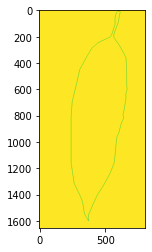

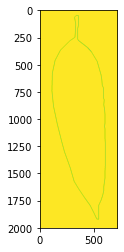

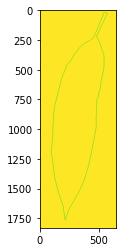

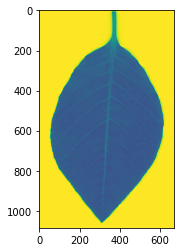

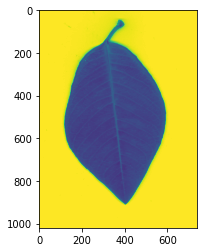

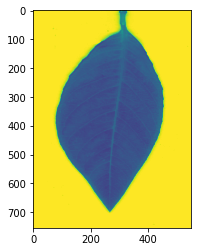

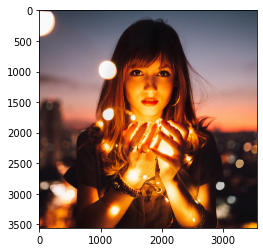

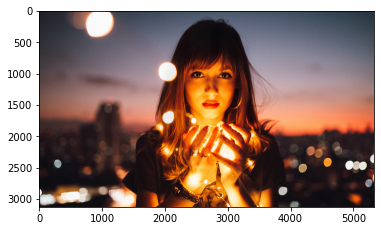

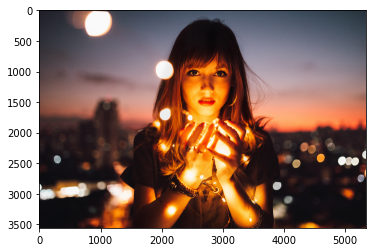

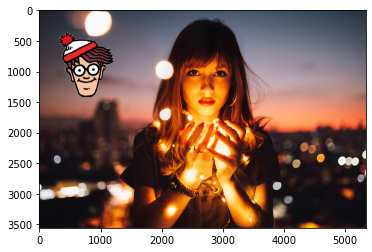

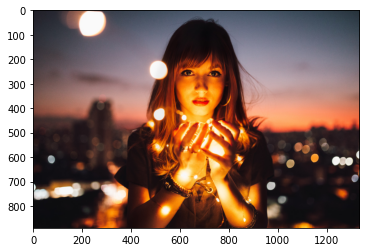

In [ ]:
print("SImilar type of images")
for i in range(len(groups)):
  for j in groups[i]:
     plt.imshow(images[j])
     plt.show()

In [ ]:
import argparse
import sys
from os import listdir
from os.path import isfile, join
from typing import Dict, List, Tuple
!pip install imagehash
import imagehash
import numpy as np
from PIL import Image


def calculate_signature(image_file: str, hash_size: int) -> np.ndarray:
    """ 
    Calculate the dhash signature of a given file
    
    Args:
        image_file: the image (path as string) to calculate the signature for
        hash_size: hash size to use, signatures will be of length hash_size^2
    
    Returns:
        Image signature as Numpy n-dimensional array or None if the file is not a PIL recognized image
    """
    pil_image = Image.open(image_file).convert("L").resize(
                        (hash_size+1, hash_size),
                        Image.ANTIALIAS)
    dhash = imagehash.dhash(pil_image, hash_size)
    signature = dhash.hash.flatten()
    pil_image.close()
    return signature

        
def find_near_duplicates(input_dir: str, threshold: float, hash_size: int, bands: int) -> List[Tuple[str, str, float]]:
    """
    Find near-duplicate images
    
    Args:
        input_dir: Directory with images to check
        threshold: Images with a similarity ratio >= threshold will be considered near-duplicates
        hash_size: Hash size to use, signatures will be of length hash_size^2
        bands: The number of bands to use in the locality sensitve hashing process
        
    Returns:
        A list of near-duplicates found. Near duplicates are encoded as a triple: (filename_A, filename_B, similarity)
    """
    rows: int = int(hash_size**2/bands)
    signatures = dict()
    hash_buckets_list: List[Dict[str, List[str]]] = [dict() for _ in range(bands)]
    
    # Build a list of candidate files in given input_dir
    file_list = [join(input_dir, f) for f in listdir(input_dir) if isfile(join(input_dir, f))]

    # Iterate through all files in input directory
    for fh in file_list:
        try:
            signature = calculate_signature(fh, hash_size)
           
        except IOError:
            # Not a PIL image, skip this file
            continue

        # Keep track of each image's signature
        signatures[fh] = np.packbits(signature)
        
        # Locality Sensitive Hashing
        for i in range(bands):
            signature_band = signature[i*rows:(i+1)*rows]
            signature_band_bytes = signature_band.tobytes()
            if signature_band_bytes not in hash_buckets_list[i]:
                hash_buckets_list[i][signature_band_bytes] = list()
            hash_buckets_list[i][signature_band_bytes].append(fh)

    # Build candidate pairs based on bucket membership
    candidate_pairs = set()
    for hash_buckets in hash_buckets_list:
        for hash_bucket in hash_buckets.values():
            if len(hash_bucket) > 1:
                hash_bucket = sorted(hash_bucket)
                for i in range(len(hash_bucket)):
                    for j in range(i+1, len(hash_bucket)):
                        candidate_pairs.add(
                            tuple([hash_bucket[i],hash_bucket[j]])
                        )

    # Check candidate pairs for similarity
    near_duplicates = list()
    for cpa, cpb in candidate_pairs:
        hd = sum(np.bitwise_xor(
                np.unpackbits(signatures[cpa]), 
                np.unpackbits(signatures[cpb])
        ))
        similarity = (hash_size**2 - hd) / hash_size**2
        if similarity > threshold:
            near_duplicates.append((cpa, cpb, similarity))
            
    # Sort near-duplicates by descending similarity and return
    near_duplicates.sort(key=lambda x:x[2], reverse=True)
    return near_duplicates


In [ ]:
threshold=0.7
hash_size=16
bands=16

near_duplicates = find_near_duplicates(input_images, threshold, hash_size, bands)
if near_duplicates:
            print(f"Found {len(near_duplicates)} near-duplicate images in {input_images} (threshold {threshold:.2%})")
            for a,b,s in near_duplicates:
                print(f"{s:.2%} similarity: file 1: {a} - file 2: {b}")
else:
            print(f"No near-duplicates found in {input_dir} (threshold {threshold:.2%})")

Found 6 near-duplicate images in /content/drive/My Drive/input_images (threshold 70.00%)
99.61% similarity: file 1: /content/drive/My Drive/input_images/girl_lights.jpg - file 2: /content/drive/My Drive/input_images/girl_lights_shrunk_to_1334x889.jpg
96.88% similarity: file 1: /content/drive/My Drive/input_images/girl_lights_shrunk_to_1334x889.jpg - file 2: /content/drive/My Drive/input_images/girl_lights_waldo.jpg
96.48% similarity: file 1: /content/drive/My Drive/input_images/girl_lights.jpg - file 2: /content/drive/My Drive/input_images/girl_lights_waldo.jpg
77.34% similarity: file 1: /content/drive/My Drive/input_images/girl_lights.jpg - file 2: /content/drive/My Drive/input_images/girl_lights_cropped_bottom.jpg
76.95% similarity: file 1: /content/drive/My Drive/input_images/girl_lights_cropped_bottom.jpg - file 2: /content/drive/My Drive/input_images/girl_lights_shrunk_to_1334x889.jpg
73.83% similarity: file 1: /content/drive/My Drive/input_images/girl_lights_cropped_bottom.jpg - 

In [ ]:
leaf_data='/content/drive/My Drive/leaf_data'
threshold=0.2
hash_size=16
bands=16

near_duplicates = find_near_duplicates(leaf_data, threshold, hash_size, bands)
if near_duplicates:
            print(f"Found {len(near_duplicates)} near-duplicate images in {leaf_data} (threshold {threshold:.2%})")
            for a,b,s in near_duplicates:
                print(f"{s:.2%} similarity: file 1: {a} - file 2: {b}")
else:
            print(f"No near-duplicates found in {leaf_data} (threshold {threshold:.2%})")

No near-duplicates found in /content/drive/My Drive/leaf_data (threshold 20.00%)


In [ ]:
def load_image(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        return img

In [ ]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
def showimages(img1,img2):
  fig = plt.figure(figsize=(10, 7))
  rows = 1
  columns = 2
  fig.add_subplot(rows, columns, 1)
  image1 = plt.imread(img1)
  plt.imshow(image1)
  plt.axis('off')
  plt.title("First Image")

  fig.add_subplot(rows, columns, 2)

  image2 = plt.imread(img2)
  plt.imshow(image2)
  plt.axis('off')
  plt.title("Second Image")


Found 6 near-duplicate images in /content/drive/My Drive/input_images (threshold 70.00%)
99.61% similarity: file 1: /content/drive/My Drive/input_images/girl_lights.jpg - file 2: /content/drive/My Drive/input_images/girl_lights_shrunk_to_1334x889.jpg
96.88% similarity: file 1: /content/drive/My Drive/input_images/girl_lights_shrunk_to_1334x889.jpg - file 2: /content/drive/My Drive/input_images/girl_lights_waldo.jpg
96.48% similarity: file 1: /content/drive/My Drive/input_images/girl_lights.jpg - file 2: /content/drive/My Drive/input_images/girl_lights_waldo.jpg
77.34% similarity: file 1: /content/drive/My Drive/input_images/girl_lights.jpg - file 2: /content/drive/My Drive/input_images/girl_lights_cropped_bottom.jpg
76.95% similarity: file 1: /content/drive/My Drive/input_images/girl_lights_cropped_bottom.jpg - file 2: /content/drive/My Drive/input_images/girl_lights_shrunk_to_1334x889.jpg
73.83% similarity: file 1: /content/drive/My Drive/input_images/girl_lights_cropped_bottom.jpg - 

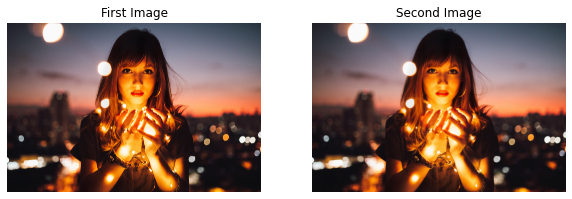

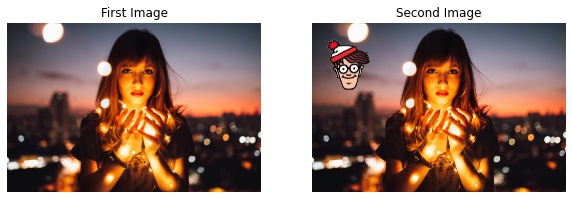

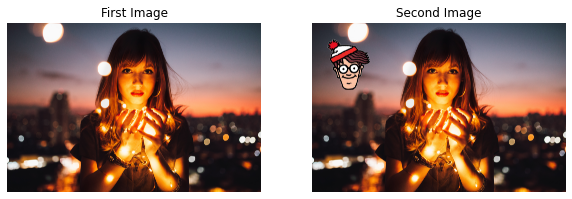

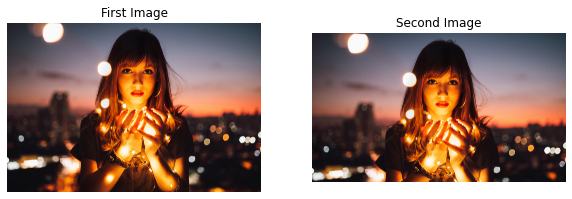

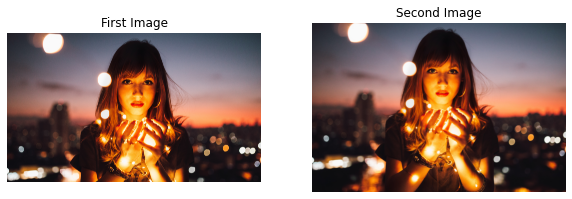

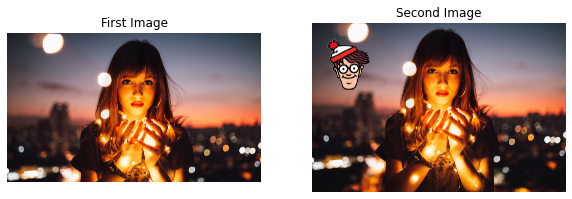

In [ ]:
from PIL import Image


threshold=0.7
hash_size=16
bands=16

near_duplicates = find_near_duplicates(input_images, threshold, hash_size, bands)
if near_duplicates:
            print(f"Found {len(near_duplicates)} near-duplicate images in {input_images} (threshold {threshold:.2%})")
            for a,b,s in near_duplicates:
                print(f"{s:.2%} similarity: file 1: {a} - file 2: {b}")

                showimages(a,b)
                # img1=a.rsplit('/', 1)[-1]
                # img2=b.rsplit('/', 1)[-1]
              
                # image = Image.open(a)
                # image.show()
                # image = plt.imread(a)
                # plt.imshow(image)
                # plt.show()
                
else:
            print(f"No near-duplicates found in {input_images} (threshold {threshold:.2%})")